# Poverty in Paris urban area

In [1]:
# Subscribe to api.insee.fr and get your credentials!
# Save your credentials with init_conn function :
# from pynsee.utils.init_conn import init_conn
# init_conn(insee_key="my_insee_key", insee_secret="my_insee_secret")

# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import clear_all_cache; clear_all_cache()"

In [2]:
from pynsee.localdata import *
from pynsee.geodata import *

import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd

In [3]:
# get a list all data available : datasets and variables
metadata = get_local_metadata()

# geographic metadata
nivgeo = get_nivgeo_list()

# get geographic area list
area = get_area_list()

# get all communes in Paris urban area
areaParis = get_included_area('unitesUrbaines2020', ['00851'])

# get selected communes identifiers
code_com_paris = areaParis.code.to_list()

!!! This function renders only package's internal data, it might not be the most up-to-date
Have a look at api.insee.fr !!!
!!! This function renders only package's internal data,
it might not be the most up-to-date
Have a look at api.insee.fr !!!


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


In [4]:
# get numeric values from INSEE database 
dataParis = get_local_data(dataset_version='GEO2020FILO2017',
                       variables =  'INDICS_FILO_DISP_DET',
                       nivgeo = 'COM',
                       geocodes = code_com_paris)

#select poverty rate data, exclude paris commune
data_plot = dataParis.loc[dataParis.UNIT=='TP60']
data_plot = data_plot.loc[data_plot.CODEGEO!='75056']

# get geographical data list
geodata_list = get_geodata_list()

# get departments geographical limits
com = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:commune')
comIdf = com[com['insee_reg'] == '11']
comIdf = comIdf[['id', 'nom_m', 'insee_com', 'geometry']]
comIdf = comIdf.rename(columns={'insee_com': 'CODEGEO'})

# get arrondissement geographical limits
arr = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:arrondissement_municipal')
arr75 = arr[arr.insee_com.str.startswith('75')]
arr75 = arr75[['id', 'nom_m', 'insee_arm', 'geometry']]
arr75 = arr75.rename(columns={'insee_arm': 'CODEGEO'})

# make ile de frande map by concatenation
mapidf = pd.concat([comIdf, arr75]).reset_index()

Getting data:   6%|▌         | 24/434 [00:06<01:48,  3.78it/s]


API query number limit reached - function might be slowed down


Getting data: 100%|█████████▉| 433/434 [14:29<00:00,  3.09it/s]  


!!! An error occurred !!!
Query : https://api.insee.fr/donnees-locales/V0.1/donnees/geo-INDICS_FILO_DISP_DET@GEO2020FILO2017/COM-78251.all
Error 404



Getting data: 100%|██████████| 434/434 [14:29<00:00,  2.00s/it]


!!! An error occurred !!!
Query : https://api.insee.fr/donnees-locales/V0.1/donnees/geo-INDICS_FILO_DISP_DET@GEO2020FILO2017/COM-78524.all
Error 404


!!! The underlying API is still at an early development stage,
future changes are likely !!!
Previously saved data used
C:\Users\hadrilec\AppData\Local/pynsee/pynsee/2ac583be54e866b2b1b30fb0113c1fd0.csv
Set update=True to get the most up-to-date data


Previously saved data used
C:\Users\hadrilec\AppData\Local/pynsee/pynsee/d64a941ae07b7f39b02b9d5fd1828888.csv
Set update=True to get the most up-to-date data
Data saved: C:\Users\hadrilec\AppData\Local/pynsee/pynsee/b8a6c3fd53b7607c450abc1eb443034a.csv


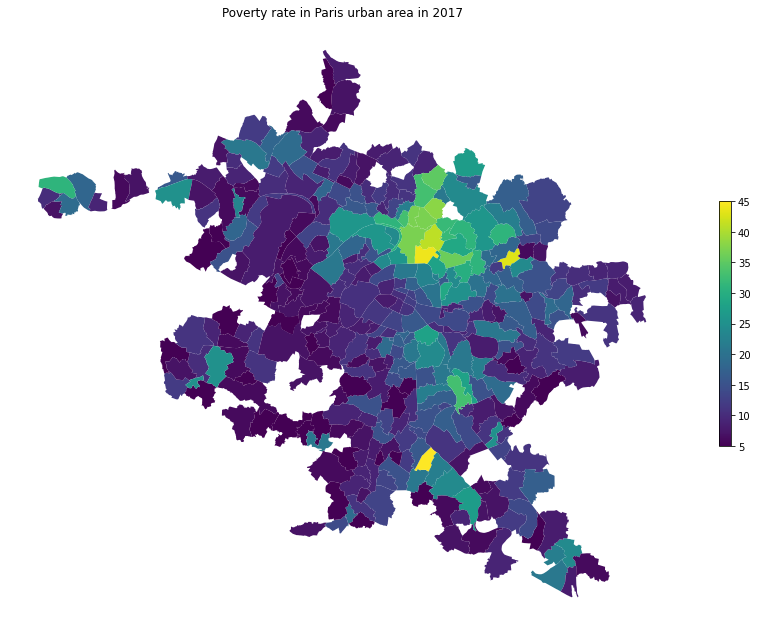

In [6]:
# merge values and geographic limits
mapparis = mapidf.merge(data_plot, how = 'right', on = 'CODEGEO')
mapparis = gpd.GeoDataFrame(mapparis).set_crs("EPSG:4326")

#plot
fig, ax = plt.subplots(1,1,figsize=[15,15])
mapparis.plot(column='OBS_VALUE', cmap=cm.viridis, 
    legend=True, ax=ax, legend_kwds={'shrink': 0.3})
ax.set_axis_off()
ax.set(title='Poverty rate in Paris urban area in 2017')
plt.show()
fig.savefig('poverty_paris_urban_area.svg',
            format='svg', dpi=1200,
            bbox_inches = 'tight',
            pad_inches = 0)